In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [173]:
laps_tiago = [44.191, 42.149, 41.622, 43.025, 42.133, 42.028, 41.507, 42.808, 41.281, 40.311, 41.922, 41.431, 44.174, 41.070, 41.868, 41.839, 41.137, 41.790, 41.995, 41.438, 41.413]
n_laps_22 = np.arange(1,22)

laps_rita = [49.208, 46.936,47.912, 50.085, 47.152, 45.899, 58.123, 47.204, 51.812, 46.149, 50.036, 46.715, 48.301, 51.121, 50.299, 46.067, 44.468, 44.638, 44.492]
n_laps_20 = np.arange(1,20)

laps_daniel = [55.079, 53.772, 54.373, 50.806, 51.330, 49.633, 49.900, 48.380, 46.692, 46.545, 46.155, 48.254, 47.107, 48.041, 46.459, 45.732, 45.697, 44.964, 48.292]

laps_margarida = [63.86, 64.04, 72.57, 69.97, 66.80, 67.81, 68.15, 68.58, 67.39, 67.32, 66.03, 67.42, 64.99]
n_laps_13 = np.arange(1,14)

drivers = ['Tiago', 'Margarida', 'Daniel', 'Rita']

df_tiago = pd.DataFrame({'Lap': n_laps_22, 'Time': laps_tiago})
df_rita = pd.DataFrame({'Lap': n_laps_20, 'Time': laps_rita})
df_daniel = pd.DataFrame({'Lap': n_laps_20, 'Time': laps_daniel})
df_margarida = pd.DataFrame({'Lap': n_laps_13, 'Time': laps_margarida})

df_all = pd.concat([df_tiago.assign(Driver='Tiago'), df_margarida.assign(Driver='Margarida'), df_daniel.assign(Driver='Daniel'), df_rita.assign(Driver='Rita')])

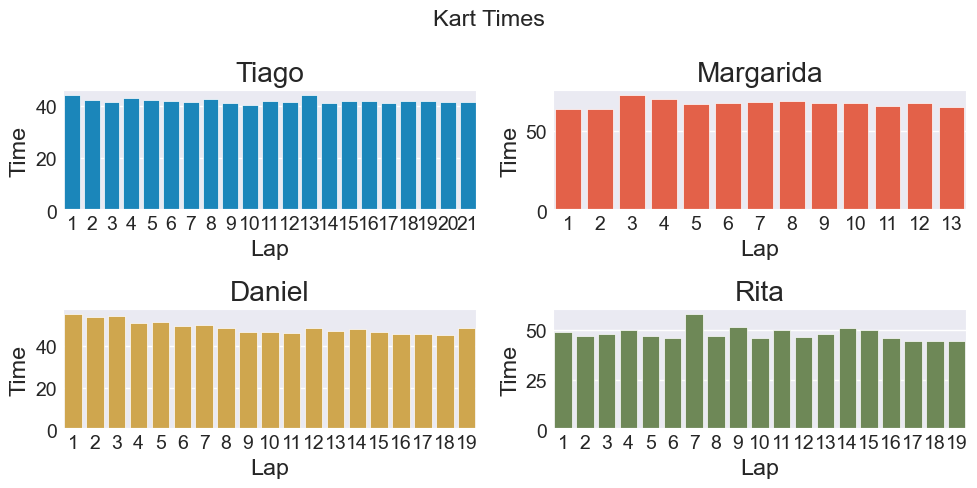

In [162]:
plt.figure(figsize=(12,5))
plt.suptitle('Kart Times')

palette = sns.color_palette(sns.color_palette().as_hex(), n_colors=4)

plt.subplot(2,2,1)
plt.title('Tiago')
sns.barplot(data=df_tiago, x='Lap', y='Time', color=palette[0])
plt.xlabel('Lap')
plt.ylabel('Time')

plt.subplot(2,2,2)
plt.title('Margarida')
sns.barplot(data=df_margarida, x='Lap', y='Time', color=palette[1])
plt.xlabel('Lap')
plt.ylabel('Time')

plt.subplot(2,2,3)
plt.title('Daniel')
sns.barplot(data=df_daniel, x='Lap', y='Time', color=palette[2])
plt.xlabel('Lap')
plt.ylabel('Time')

plt.subplot(2,2,4)
plt.title('Rita')
sns.barplot(data=df_rita, x='Lap', y='Time', color=palette[3])
plt.xlabel('Lap')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

In [79]:
mean_tiago = round(df_tiago.Time.mean(),3)
mean_margarida = round(df_margarida.Time.mean(),3)
mean_daniel = round(df_daniel.Time.mean(),3)
mean_rita = round(df_rita.Time.mean(),3)

means = [mean_tiago, mean_margarida, mean_daniel, mean_rita]

std_tiago = round(df_tiago.Time.std(),3)
std_margarida = round(df_margarida.Time.std(),3)
std_daniel = round(df_daniel.Time.std(),3)
std_rita = round(df_rita.Time.std(),3)

stds = [std_tiago, std_margarida, std_daniel, std_rita]

min_tiago = round(df_tiago.Time.min(),3)
min_margarida = round(df_margarida.Time.min(),3)
min_daniel = round(df_daniel.Time.min(),3)
min_rita = round(df_rita.Time.min(),3)

mins = [min_tiago, min_margarida, min_daniel, min_rita]

stats = pd.DataFrame({'Driver':['Tiago', 'Margarida', 'Daniel', 'Rita'],'Mean': means,'Std': stds, 'Fastest': mins})

print(stats.to_markdown(index=False))

| Driver    |   Mean |   Std |   Fastest |
|:----------|-------:|------:|----------:|
| Tiago     | 41.959 | 0.94  |    40.311 |
| Margarida | 67.302 | 2.367 |    63.86  |
| Daniel    | 48.801 | 3.05  |    44.964 |
| Rita      | 48.243 | 3.272 |    44.468 |


<AxesSubplot: xlabel='Lap', ylabel='Time'>

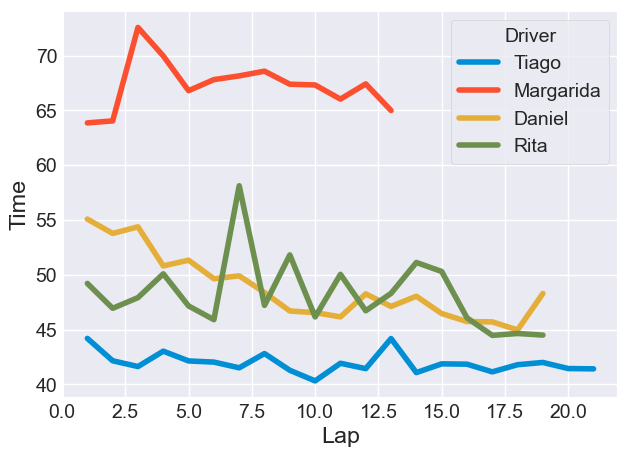

In [141]:
sns.lineplot(data=df_all, x='Lap', y='Time', hue='Driver')

<AxesSubplot: xlabel='Lap', ylabel='Time'>

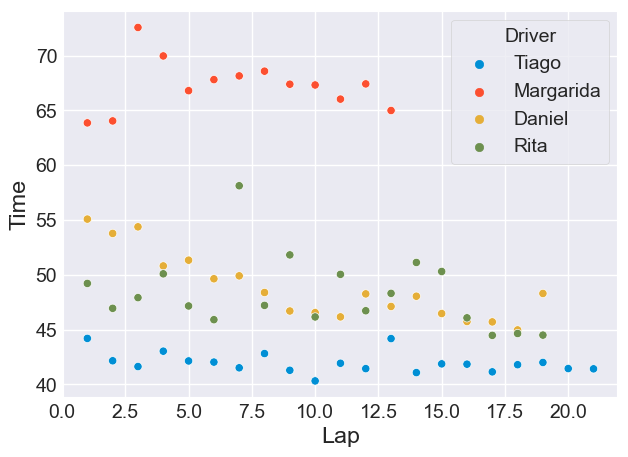

In [142]:
plt.title('Lap Times')

sns.scatterplot(data=df_all, x='Lap', y='Time', hue='Driver')

[]

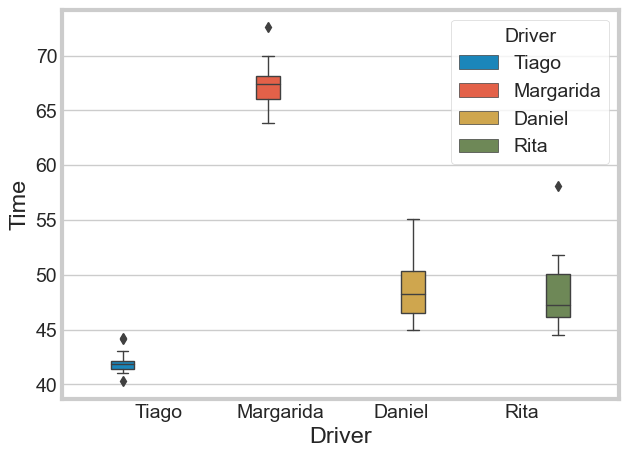

In [126]:
plt.title('Lap Time Distribution by Driver')

sns.boxplot(data=df_all, x='Driver', y='Time', hue='Driver', linewidth=1)

plt.plot()

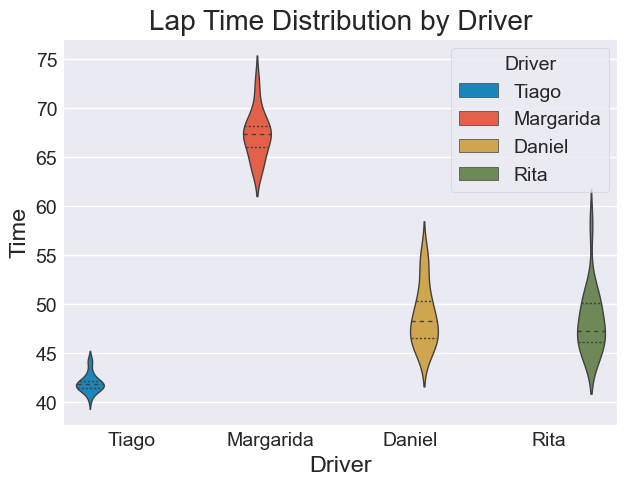

In [131]:
plt.title('Lap Time Distribution by Driver')

sns.violinplot(x='Driver', y='Time', data=df_all, linewidth=1, inner='quartile', hue='Driver')

plt.show()

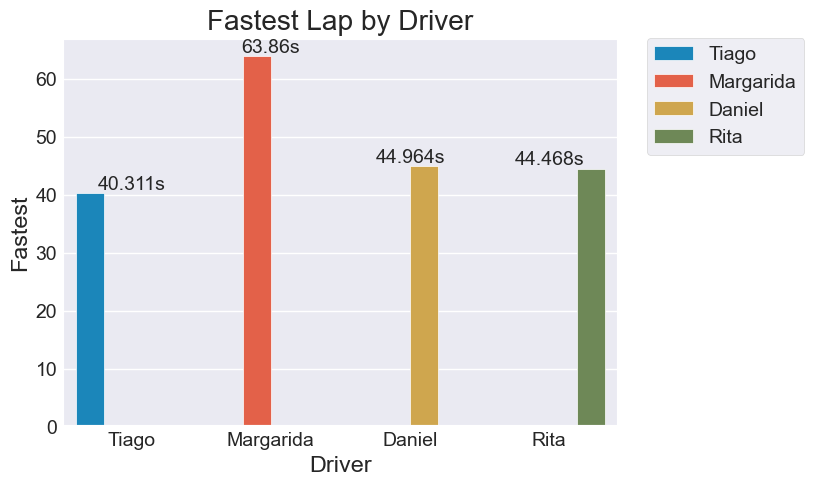

In [169]:
plt.title('Fastest Lap by Driver')
sns.barplot(data=stats, x='Driver', y='Fastest', hue='Driver')

for index, row in stats.iterrows():
    plt.annotate(f"{row['Fastest']}s", xy=(index, row['Fastest']), ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot: title={'center': 'Lap Comparison'}, xlabel='Lap', ylabel='Driver'>

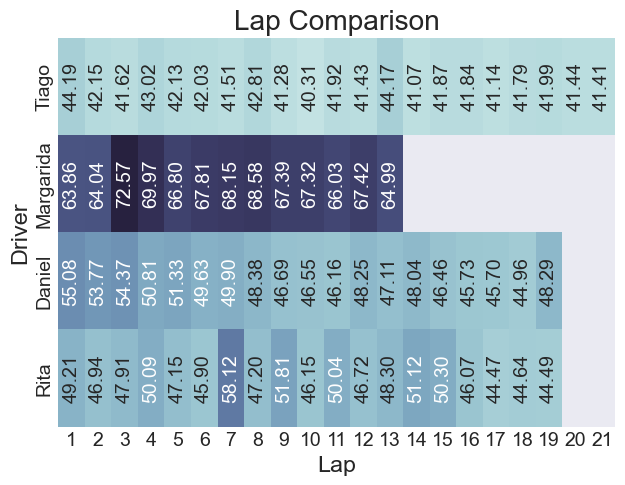

In [222]:
plt.title('Lap Comparison')

palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)


df_pivot = df_all.pivot(index='Driver', columns='Lap', values='Time')
df_pivot = df_pivot.reindex(index=drivers)
sns.heatmap(df_pivot, cmap=palette, annot=True, fmt='.2f', cbar=False, annot_kws={"rotation": 90})

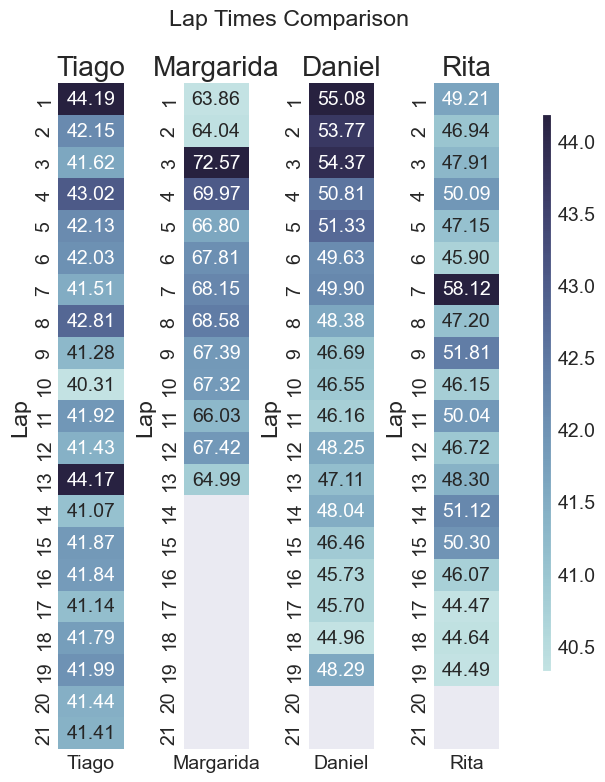

In [223]:
fig, axs = plt.subplots(ncols=len(drivers), figsize=(6,len(drivers)*2))
fig.suptitle('Lap Times Comparison')

mappable_list = []

for i, driver in enumerate(drivers):
    df_subset = df_pivot[df_pivot.index==driver].T
    
    hm = sns.heatmap(df_subset, cmap=palette, annot=True, fmt='.2f', cbar=False, ax=axs[i])
    axs[i].set_title(driver)
    axs[i].set_xlabel('')
    
    axs[i].set_ylabel('Lap')

    mappable_list.append(hm.get_children()[0])
    
plt.tight_layout()
plt.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(cax=cbar_ax, mappable= mappable_list[0], shrink=0.6, pad=0.05)